# Explaining Ford GoBike Data - February 2019
## by Adam Catney

## Investigation Overview

In this investigation I sought to look through the Ford GoBike Data, formerly known as Bay Wheels, for the period of February 2019. The Data we're looking at in particular is for the large-scale bicycle sharing system in the region of San Francisco.

My focus was on looking at the users (both subscribers and customers) and the details of the members from their age & gender to the frequency of trips throughout the month.

## Dataset Overview

 - The data has 174,952 entries after some cleaning and tidying.
 - The dataset also has 11 attributes.
 - The main data I was most interested in was: Duration of Trips, Date/Time of the Trips, Gender of Members, Type of Member, Members Birth Year/Age & whether or not the trip was part of the Bike Share for All Scheme.

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bike_data_clean.csv')

## Visualisation 1: Bike Trips Throughout the Month

When looking at trips throughout the Month

 - Both Men & Women share the same trends with less Female Members taking Trips throughout the month.
 - The troughs that we see mostly align with the weekends showing that the Bike scheme is less popular outside of the working week. This is likely due to the majority of members using the program for commutting which is more from Monday to Friday for work or school.
 - There are other dips which may be down to poor weather or other conditions which make travelling by bike unfavourable.

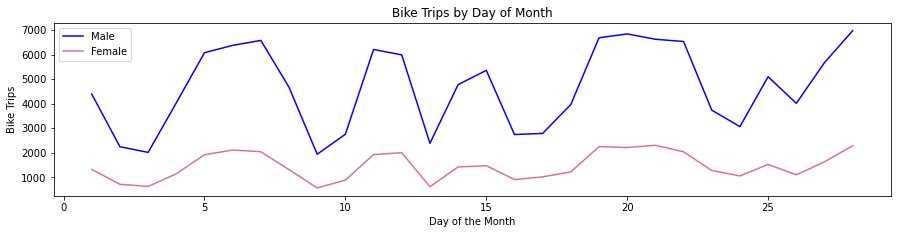

In [22]:
# setting up params
fig = plt.figure(figsize = [15,7])
ax = plt.subplot(2, 1, 1)

#plotting male data
df.groupby([df[df['member_gender']=='Male']['start_time_day']]).size().plot(c='Blue', label='Male')

#plotting female data
df.groupby([df[df['member_gender']=='Female']['start_time_day']]).size().plot(c='palevioletred', label='Female')

plt.title("Bike Trips by Day of Month")
plt.xlabel('Day of the Month')
plt.ylabel('Bike Trips')

plt.legend(loc='best')  # legend location = best
plt.show()

## Visualisation 2: Bike Trips Throughout the Day

From the below look at the Bike Trips throughout a 24 period we can see:
 - We can see the busiest hours for the Scheme are when trips peak at 08:00 & 17:00. 
     - This seems to likely coincide with the usual times people would be leaving home for work in the morning and leaving work in the late afternoon.
 - We see that there is still activity, much significantly reduced, during the morning anf afternoon from 10:00 to 15:00.
 - Trips nearly cease altogether by Midnight, with the drop of rapidly increasing in speed from 20:00.
 - The early AM is very quiet and we don't see it start to pick up again until 05:00 which could be attributed to early starts at work or errands before going to work.

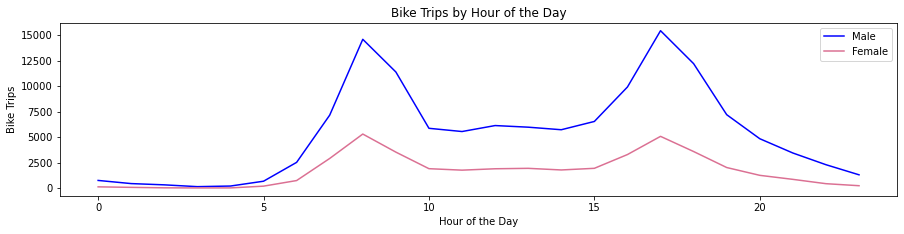

In [23]:
# setting up params
fig = plt.figure(figsize = [15,7])
ax = plt.subplot(2, 1, 1)

#plotting male data
df.groupby([df[df['member_gender']=='Male']['start_time_hour']]).size().plot(c='Blue', label='Male')

#plotting female data
df.groupby([df[df['member_gender']=='Female']['start_time_hour']]).size().plot(c='palevioletred', label='Female')

plt.title("Bike Trips by Hour of the Day")
plt.xlabel('Hour of the Day')
plt.ylabel('Bike Trips')

plt.legend(loc='best')  # legend location = best
plt.show()

## Visualization 3: Bike Share For All Scheme

We can see from the visualisation below:
* Only Subscribers take part in the Bike Share For All Scheme.
* More Men take part in the Scheme than Women.
* Less than 20,000 people overall take part in the Scheme out of the 174,952 members.

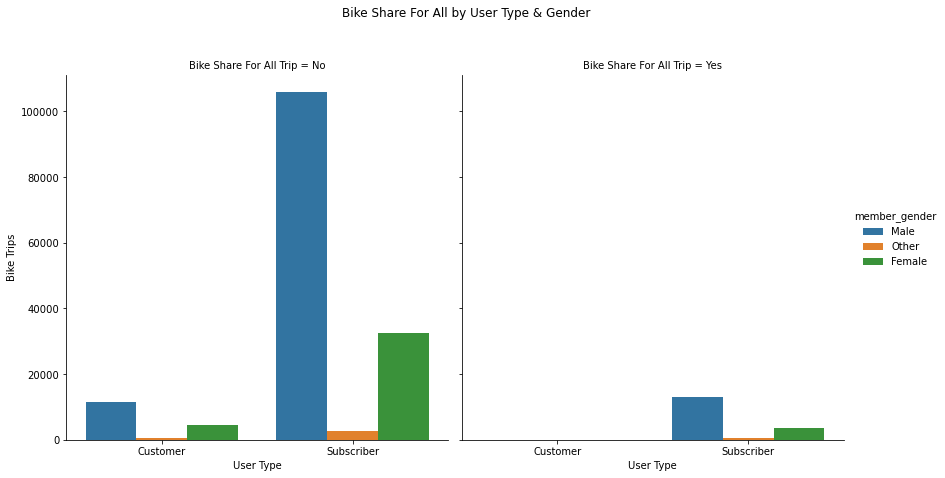

In [24]:
graph3 = sb.catplot(data = df, x = 'user_type', col = 'bike_share_for_all_trip', hue = 'member_gender',
                    height = 6, kind = 'count')
graph3.fig.suptitle('Bike Share For All by User Type & Gender', y = '1.1')
graph3.set_axis_labels('User Type', 'Bike Trips')
graph3.set_titles('Bike Share For All Trip = ' + '{col_name}')

## Visualization 4: Age & Gender of Members

Looking at the below visualisation of Customers & Subscribers by Age and Gender we can see:
 - The eldest members are Men who use the Subscription model of membership.
 - Men tend to be older in general than Women having both a higher median age and higher maximum.
 - The lowest age is 18 which may be a qualifying feature for using the scheme.

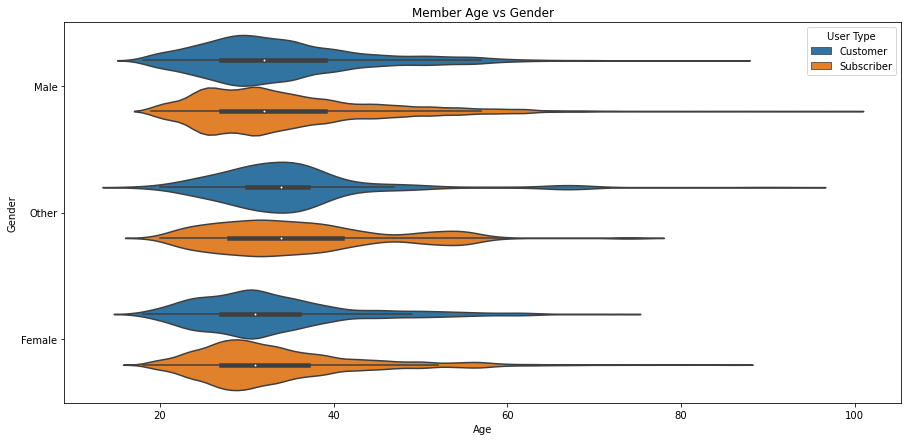

In [25]:
plt.figure(figsize=(15, 7))
sb.violinplot(data = df, y='member_gender', x='member_age', hue = 'user_type')

plt.title('Member Age vs Gender')
plt.ylabel('Gender')
plt.xlabel('Age')
plt.legend(title = 'User Type')

plt.show()

## Visualization 5: Distribution of Bike Trips

The below visualisation has undergone a logarithmic transformation, we can now see the data shows us a normal distribution curve for the length of the Bike Trips. 
We can see that most trips are short only lasting around 10 minutes with the average trip duration being 11 minutes.

Text(0, 0.5, 'No. of Bike Trips')

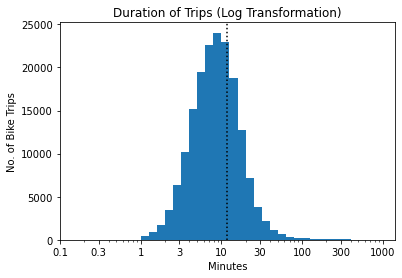

In [26]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(0, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=df, x='duration_min', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# average line
duration_min_mean=df.duration_min.mean()
plt.axvline(duration_min_mean,label= 'Mean = '+str(round(duration_min_mean)) , linestyle = 'dotted', color='black')

# Apply x-ticks
plt.xticks(ticks, labels);

plt.title('Duration of Trips (Log Transformation)')
plt.xlabel('Minutes')
plt.ylabel('No. of Bike Trips')